<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Profesor: Tomás Fontecilla </em><br>

</div>

# Machine Learning: Laboratorio 02
*28 de Septiembre de 2024*

**Nombre Estudiante(s)**: `Gabriel Álvarez - Cristián Pizarro - César Soto - Rosario Valderrama Labarca`

In [28]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install scipy
# !pip install scikit-learn

In [27]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

In [28]:
# Para imprimir la paleta de colores en Código RGBa
def print_paleta(paleta,etiqueta ):
    print(f"\nPaleta de colores usando {etiqueta}:")
    for i, color in enumerate(paleta):
        print(f"Color {i+1}: {color}")
        
def img_paleta(colores):
    plt.figure(figsize=(12, 2))
    plt.title('Colores promedio')
    plt.imshow([colores])  # Esto es para mostrar los colores obtenidos
    plt.axis('off')
    plt.show()


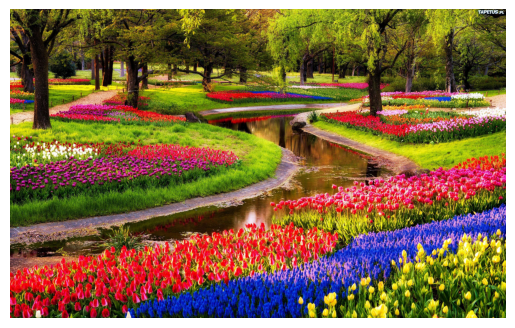

In [29]:
# Cargamos la imagen
image_path = '../data/flores3.png'  
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off') 
plt.show()

Convertimos la imagen en matriz de pixeles: toma la imagen y la convierte en una matriz 2D de píxeles, cada uno representado por valores RGB.

In [30]:
# Convertimos la imagen a una matriz de píxeles
image_np = np.array(image)
print(f"Forma original de la imagen: {image_np.shape}")

pixels = image_np.reshape(-1, 4)
print(f"Forma de la imagen convertida en píxeles: {pixels.shape}")

Forma original de la imagen: (920, 1479, 4)
Forma de la imagen convertida en píxeles: (1360680, 4)


# 1) Aplicamos k-means:

## *Probamos con 6 clusters y vemos que la "intertia" se da en el 3.*

In [31]:
# Ejectutamos kmeans, calculamos inertia y distortion para distintos k (clusters). 
inertia = []
distortion = []
cluster_range = range(1, 10)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixels)
    inertia.append(kmeans.inertia_)
    distortion.append(sum(np.min(cdist(pixels, kmeans.cluster_centers_,
                                    'euclidean'), axis=1)) / pixels.shape[0])

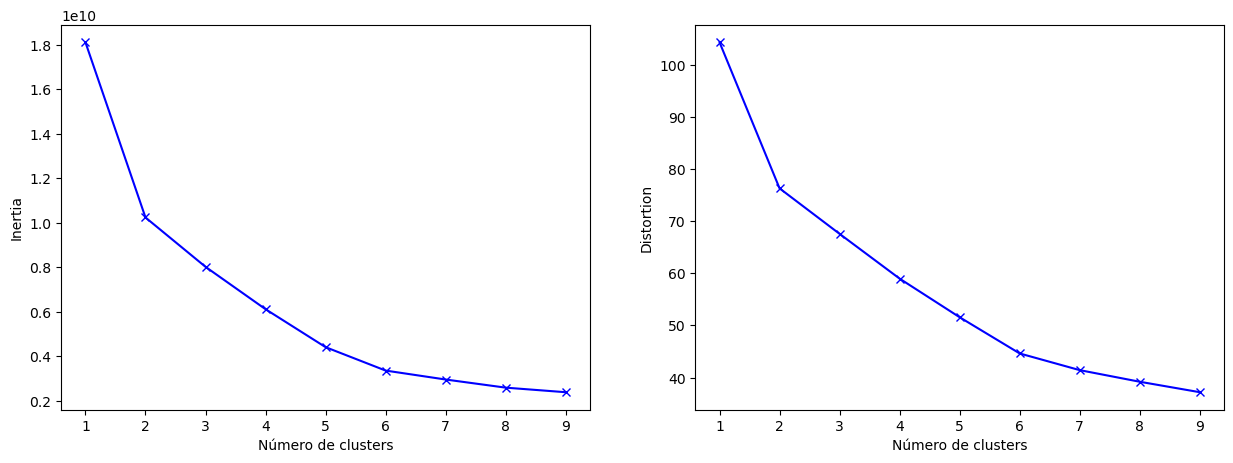

In [32]:
## Graficamos los resultados
fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(cluster_range, inertia, 'bx-')
ax[0].set_xlabel('Número de clusters')
ax[0].set_ylabel('Inertia')

ax[1].plot(cluster_range, distortion, 'bx-')
ax[1].set_xlabel('Número de clusters')
ax[1].set_ylabel('Distortion')

plt.show()

Decidimos finalmente aplicar K-means con 3 clusters para reducir la paleta de colores de la imagen. Luego procederemos con el clustering jerárquico y las mezclas de gaussianas.

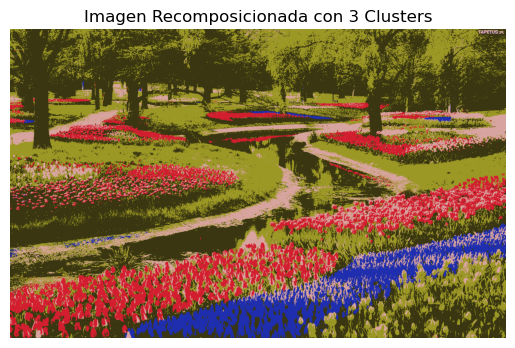

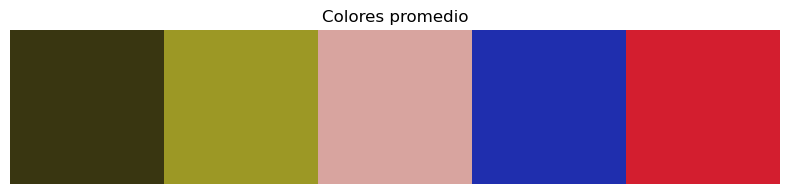


Paleta de colores usando KMeans:
Color 1: [ 57  54  17 255]
Color 2: [156 152  37 255]
Color 3: [216 164 159 255]
Color 4: [ 31  46 174 255]
Color 5: [211  30  47 255]


In [33]:
# Aplicamos KMeans con 3 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(pixels)

# Obtenemos los centroides, o colores, de los clusters
centroids = np.array(kmeans.cluster_centers_, dtype='uint8')

# Asignamos cada píxel a su color más cercano, luego recomponemos la imagen
labels = kmeans.labels_
reconstructed_image = centroids[labels].reshape(image_np.shape)

plt.imshow(reconstructed_image)
plt.axis('off')  # No mostrar los ejes
plt.title('Imagen Recomposicionada con 3 Clusters')
plt.show()
img_paleta(centroids)
print_paleta(centroids, "KMeans")

### *Probamos comparación de las 3 opciones analizadas*

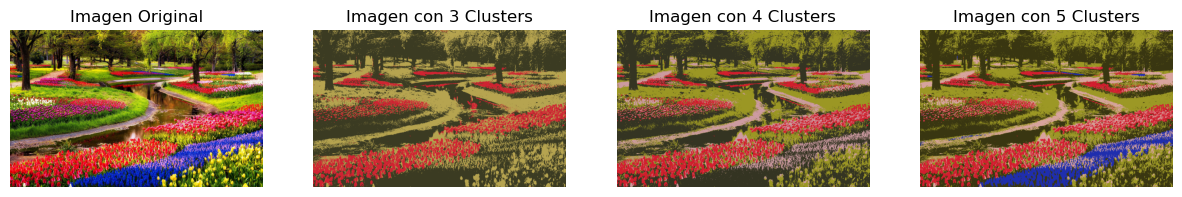


Paleta de colores usando Imagen con 3 Clusters:
Color 1: [208  35  50 255]
Color 2: [ 59  59  34 255]
Color 3: [182 164  80 255]


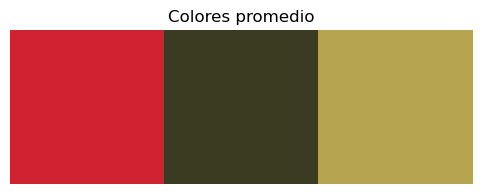


Paleta de colores usando Imagen con 4 Clusters:
Color 1: [155 151  36 255]
Color 2: [ 52  52  34 255]
Color 3: [210  30  45 255]
Color 4: [205 155 162 255]


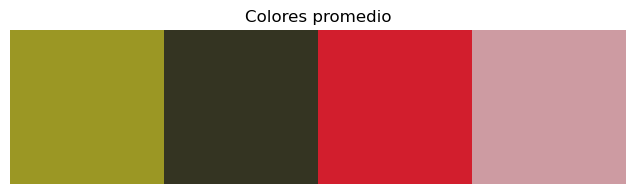


Paleta de colores usando Imagen con 5 Clusters:
Color 1: [ 57  54  17 255]
Color 2: [156 152  37 255]
Color 3: [216 164 159 255]
Color 4: [ 31  46 174 255]
Color 5: [211  30  47 255]


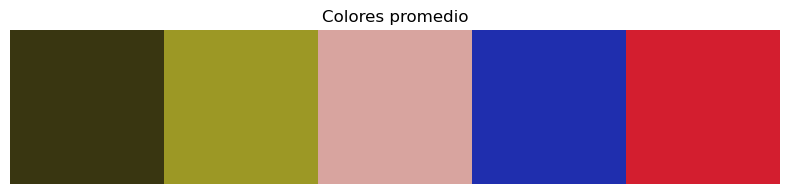

In [34]:
# Función para aplicar KMeans y recomponer la imagen con un número dado de clusters
def apply_kmeans_and_reconstruct(n_clusters, pixels, image_shape):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(pixels)
    centroids = np.array(kmeans.cluster_centers_, dtype='uint8')
    labels = kmeans.labels_
    reconstructed_image = centroids[labels].reshape(image_shape)
    return reconstructed_image, centroids

# Aplicamos KMeans para 3, 5 y 6 clusters
image_3_clusters,centroids1 = apply_kmeans_and_reconstruct(3, pixels, image_np.shape)
image_5_clusters,centroids2 = apply_kmeans_and_reconstruct(4, pixels, image_np.shape)
image_6_clusters,centroids3 = apply_kmeans_and_reconstruct(5, pixels, image_np.shape)

# Mostramos las imágenes recompuestas para comparar visualmente
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title('Imagen Original')
plt.axis('off')  

plt.subplot(1, 4, 2)
plt.imshow(image_3_clusters)
plt.axis('off')
plt.title('Imagen con 3 Clusters')

plt.subplot(1, 4, 3)
plt.imshow(image_5_clusters)
plt.axis('off')
plt.title('Imagen con 4 Clusters')

plt.subplot(1, 4, 4)
plt.imshow(image_6_clusters)
plt.axis('off')
plt.title('Imagen con 5 Clusters')


plt.show()

## Mostramos las paletas de colores resultantes 
print_paleta(centroids1, 'Imagen con 3 Clusters')
img_paleta(centroids1)
print_paleta(centroids2, 'Imagen con 4 Clusters')
img_paleta(centroids2)
print_paleta(centroids3, 'Imagen con 5 Clusters')
img_paleta(centroids3)


# 2) Gaussian Mixtures: 
#### Son otra forma de hacer clustering. Mientras que Kmeans asume los clusters esféricos y de tamaño similar, GMM permite que los clusters tengan diferentes formas, tamaños y distribuciones. En lugar de asignar un dato a un único cluster, GMM asignga probabilidades a los datos, los que significa que cada punto tiene una probabilidad de pertenecer a cada cluster.

In [35]:
# Generamos y comparamos diferentes modelos de Gaussian Mixtures a través de AIC y BIC
n_clusters = range(1, 10) 
aic = []
bic = []

for n in n_clusters:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(pixels)
    aic.append(gmm.aic(pixels))
    bic.append(gmm.bic(pixels))

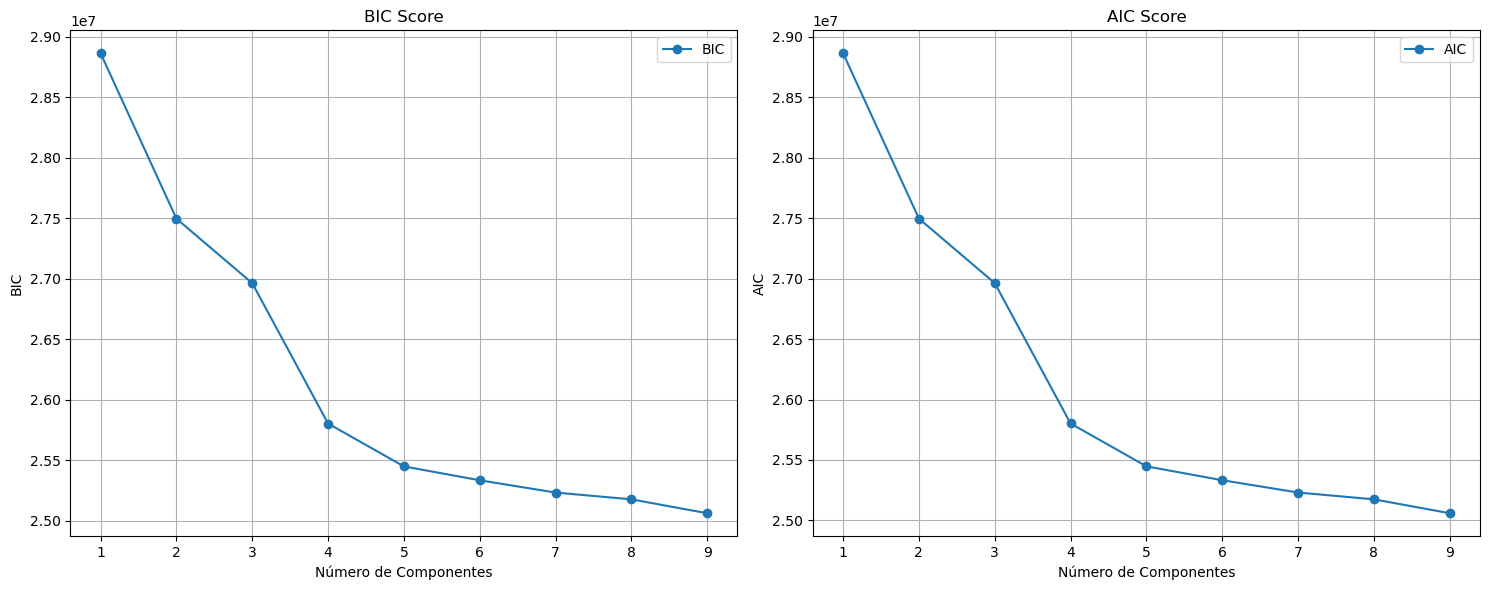

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Graficamos BIC y AIC
ax[0].plot(n_clusters, bic, marker='o', label='BIC')
ax[0].set_xlabel('Número de Componentes')
ax[0].set_ylabel('BIC')
ax[0].set_title('BIC Score')
ax[0].grid()
ax[0].legend()

ax[1].plot(n_clusters, aic, marker='o', label='AIC')
ax[1].set_xlabel('Número de Componentes')
ax[1].set_ylabel('AIC')
ax[1].set_title('AIC Score')
ax[1].grid()
ax[1].legend()

plt.tight_layout()
plt.show()

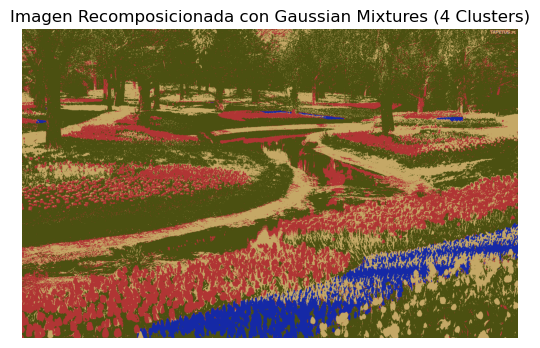

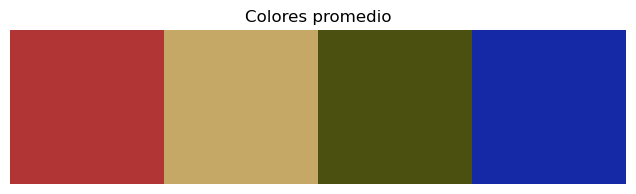


Paleta de colores usando Imagen Recomposicionada con Gaussian Mixtures (4 Clusters):
Color 1: [176  53  52 255]
Color 2: [197 168 102 255]
Color 3: [ 75  80  17 255]
Color 4: [ 21  41 166 255]


In [38]:
# Aplicamos Gaussian Mixture Model (GMM) con 4 clusters
n_clusters = 4
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm.fit(pixels)

# Obtenemos los clusters y las probabilidades de pertenencia
labels = gmm.predict(pixels)
centroids = np.array(gmm.means_, dtype='uint8')  # Los centroides son las medias de las gaussianas

# Recomponemos la imagen con los colores resultantes de las gaussianas y visualizamos los resultados
reconstructed_image_gmm = centroids[labels].reshape(image_np.shape)

plt.imshow(reconstructed_image_gmm)
plt.axis('off')
plt.title(f'Imagen Recomposicionada con Gaussian Mixtures ({n_clusters} Clusters)')
plt.show()
img_paleta(centroids)
print_paleta(centroids, f'Imagen Recomposicionada con Gaussian Mixtures ({n_clusters} Clusters)')


Este scree-plot muestra un cambio de dirección notorio al rededor de 4 clusters. Esto confirma que 4 sería un buen número para agregar colores para recomponer la imagen. Si agregamos más clusters no reduciría variablemente la variabilidad.

# 3) Clustering Jerárquico: 
#### Aplicar este algoritmo para encontrar agrupaciones en los datos basadas en una jerarquía de similitudes entre puntos (Para agrupar los píxeles similares).

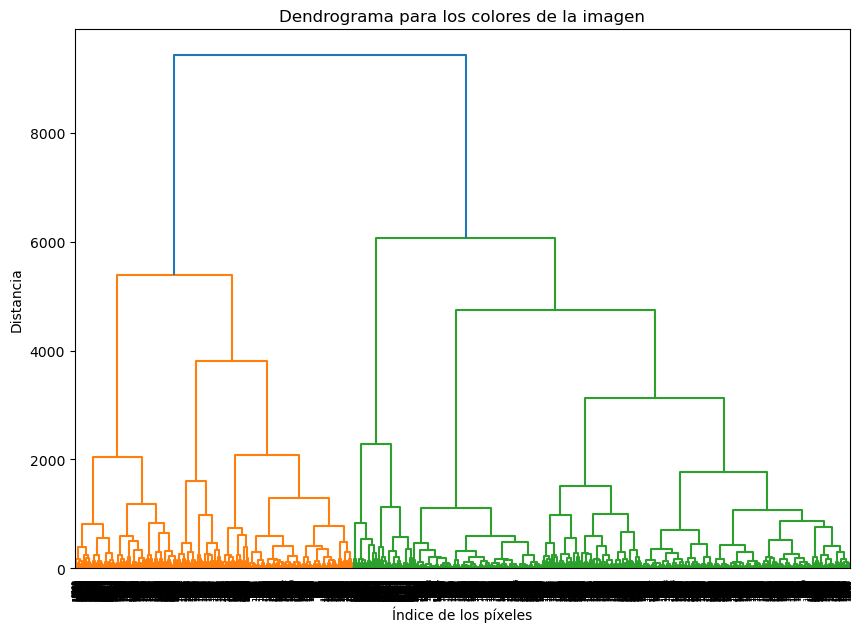

In [42]:
# Reducimos la cantidad de pixeles para facilitar el procesamiento
image = image.resize((148, 92))
pixels = np.array(image) 
pixels = pixels.reshape((-1, 4))

# Aplicamos clustering jerárquico
Z = linkage(pixels, method='ward')

# Graficamos el dendograma
plt.figure(figsize=(10, 7))
plt.title('Dendrograma para los colores de la imagen')
plt.xlabel('Índice de los píxeles')
plt.ylabel('Distancia')
dendro = dendrogram(Z)
plt.show()

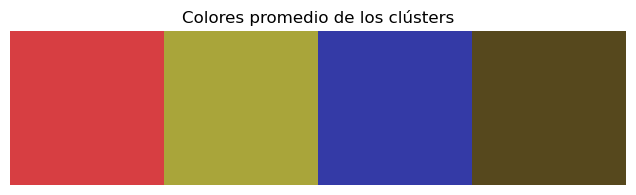


Paleta de colores usando :
Color 1: [215  62  66 255]
Color 2: [169 165  58 255]
Color 3: [ 52  58 166 255]
Color 4: [ 86  72  29 255]


In [47]:
### Cortamos el dendograma a una distancia máxima de 5.000
max_d = 5000 
clusters = fcluster(Z, max_d, criterion='distance')

# Obtenemos la paleta de colores
clusters_unique = np.unique(clusters)
cluster_colors = []

for cluster in clusters_unique:
    cluster_pixels = pixels[clusters == cluster]
    cluster_mean = cluster_pixels.mean(axis=0)
    cluster_colors.append(cluster_mean)

cluster_colors = np.array(cluster_colors).astype(np.uint8)

plt.figure(figsize=(12, 2))
plt.title('Colores promedio de los clústers')
plt.imshow([cluster_colors]) 
plt.axis('off')
plt.show()

print_paleta(cluster_colors, '')

In [56]:
# Datos originales
data = np.array(image)
original_shape = data.shape

# Aplicamos clustering jerárquico con 4 clusters
n_clusters = 4 
clustering = AgglomerativeClustering(n_clusters=n_clusters)
labels = clustering.fit_predict(pixels)

# Obtenemos los colores promedio
colors = np.array([pixels[labels == i].mean(axis=0) for i in range(n_clusters)])

# Asignamos los nuevos colores a los píxeles
new_image_pixels = colors[labels].reshape(original_shape).astype(np.uint8)

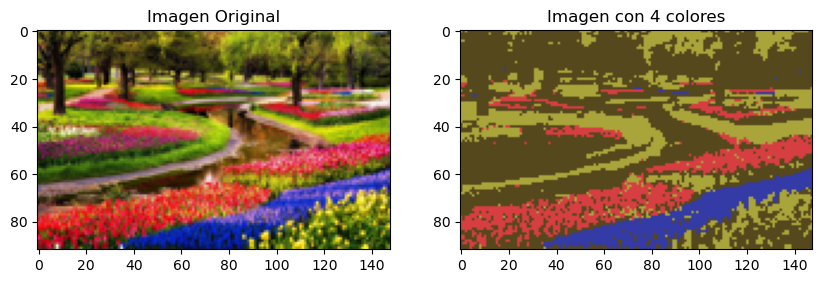

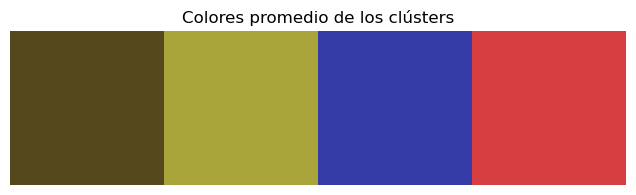


Paleta de colores usando Imagen con 4 colores:
Color 1: [ 86  72  29 255]
Color 2: [169 165  58 255]
Color 3: [ 52  58 166 255]
Color 4: [215  62  66 255]


In [57]:
# Mostramos la comparación entre la imagen original contra la recompuesta
plt.figure(figsize=(10, 5))

# Imagen original
plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(image)

# Imagen recompuesta
plt.subplot(1, 2, 2)
plt.title(f"Imagen con {n_clusters} colores")
plt.imshow(new_image_pixels)

plt.show()

plt.figure(figsize=(12, 2))
plt.title('Colores promedio de los clústers')
plt.imshow([(colors).astype(int)])  # Mostrar los colores obtenidos
plt.axis('off')
plt.show()

print_paleta((colors).astype(int), f'Imagen con {n_clusters} colores')